
Training with SGD Optimizer:
Epoch 1/50 - SGD Loss: 0.8308
Epoch 2/50 - SGD Loss: 0.8282
Epoch 3/50 - SGD Loss: 0.8261
Epoch 4/50 - SGD Loss: 0.8244
Epoch 5/50 - SGD Loss: 0.8221
Epoch 6/50 - SGD Loss: 0.8208
Epoch 7/50 - SGD Loss: 0.8188
Epoch 8/50 - SGD Loss: 0.8173
Epoch 9/50 - SGD Loss: 0.8157
Epoch 10/50 - SGD Loss: 0.8144
Epoch 11/50 - SGD Loss: 0.8130
Epoch 12/50 - SGD Loss: 0.8113
Epoch 13/50 - SGD Loss: 0.8104
Epoch 14/50 - SGD Loss: 0.8089
Epoch 15/50 - SGD Loss: 0.8075
Epoch 16/50 - SGD Loss: 0.8061
Epoch 17/50 - SGD Loss: 0.8045
Epoch 18/50 - SGD Loss: 0.8032
Epoch 19/50 - SGD Loss: 0.8019
Epoch 20/50 - SGD Loss: 0.8007
Epoch 21/50 - SGD Loss: 0.7992
Epoch 22/50 - SGD Loss: 0.7981
Epoch 23/50 - SGD Loss: 0.7972
Epoch 24/50 - SGD Loss: 0.7954
Epoch 25/50 - SGD Loss: 0.7937
Epoch 26/50 - SGD Loss: 0.7928
Epoch 27/50 - SGD Loss: 0.7917
Epoch 28/50 - SGD Loss: 0.7900
Epoch 29/50 - SGD Loss: 0.7892
Epoch 30/50 - SGD Loss: 0.7877
Epoch 31/50 - SGD Loss: 0.7866
Epoch 32/50 - SGD 

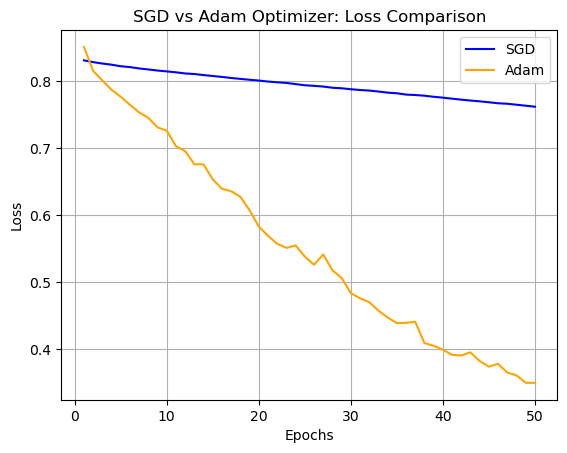

In [5]:
from tensorflow.keras import layers, models, optimizers
import numpy as np
import matplotlib.pyplot as plt

def create_data():
    X = np.random.randn(1000, 10)
    y = np.random.randn(1000, 1)
    return X, y

def create_model():
    model = models.Sequential([
        layers.Dense(100, activation='relu', input_shape=(10,)),
        layers.Dense(50, activation='relu'),
        layers.Dense(25, activation='relu'),
        layers.Dense(1)
    ])
    return model

def train_model_with_history(model, optimizer, X, y, batch_size, epochs, optimizer_name):
    model.compile(optimizer=optimizer, loss='mean_absolute_error')
    history = []

    for epoch in range(epochs):
        hist = model.fit(X, y, batch_size=batch_size, epochs=1, verbose=0)
        loss = hist.history['loss'][0]
        history.append(loss)
        print(f"Epoch {epoch + 1}/{epochs} - {optimizer_name} Loss: {loss:.4f}")
    
    return history

X, y = create_data()

model_sgd = create_model()
model_adam = create_model()

optimizer_sgd = optimizers.SGD(learning_rate=0.01)
optimizer_adam = optimizers.Adam(learning_rate=0.001)

epochs = 50
batch_size = 32

print("\nTraining with SGD Optimizer:")
sgd_loss = train_model_with_history(model_sgd, optimizer_sgd, X, y, batch_size, epochs, 'SGD')

print("\nTraining with Adam Optimizer:")
adam_loss = train_model_with_history(model_adam, optimizer_adam, X, y, batch_size, epochs, 'Adam')

plt.plot(range(1, epochs + 1), sgd_loss, label='SGD', color='blue')
plt.plot(range(1, epochs + 1), adam_loss, label='Adam', color='orange')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('SGD vs Adam Optimizer: Loss Comparison')
plt.legend()
plt.grid(True)
plt.show()
